In [21]:
import pandas as pd

df = pd.read_csv("311_Service_Requests_from_June_2021_to_Present.csv")

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
df.shape

(813514, 43)

In [23]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,49891797,03/01/2021 12:00:02 AM,03/01/2021 02:33:12 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10453.0,1705 ANDREWS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.849901,-73.918050,"(40.84990124924224, -73.9180502434322)"
1,49890117,03/01/2021 12:00:10 AM,03/01/2021 12:16:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11213.0,198 ROCHESTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672501,-73.927998,"(40.67250142020611, -73.92799802462538)"
2,49895801,03/01/2021 12:00:21 AM,03/01/2021 12:22:34 AM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10029.0,2070 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797321,-73.940490,"(40.797320741003375, -73.94048961249807)"
3,49903649,03/01/2021 12:01:00 AM,03/02/2021 02:00:00 AM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10306.0,2144 SOUTH RAILROAD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.558427,-74.133998,"(40.55842709584167, -74.13399813577169)"
4,49892231,03/01/2021 12:01:51 AM,03/01/2021 01:31:33 AM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11432.0,84-79 168 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714459,-73.795921,"(40.71445879152186, -73.79592053239769)"


In [24]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                          float64
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [25]:
df['created_at'] = pd.to_datetime(df['Created Date'])
df['closed_at'] = pd.to_datetime(df['Closed Date'])

In [26]:
df['created_at'].head()

0   2021-03-01 00:00:02
1   2021-03-01 00:00:10
2   2021-03-01 00:00:21
3   2021-03-01 00:01:00
4   2021-03-01 00:01:51
Name: created_at, dtype: datetime64[ns]

In [97]:
closed_df = df[~df["closed_at"].isnull()]
closed_df = closed_df[~closed_df["created_at"].isnull()]

In [98]:
closed_df.shape

(788478, 45)

In [35]:
df["created_month"] = df["created_at"].dt.strftime("%Y-%m")

In [36]:
df["created_month"].head()

0    2021-03
1    2021-03
2    2021-03
3    2021-03
4    2021-03
Name: created_month, dtype: object

In [37]:
noise_complaints_by_month = df["created_month"].value_counts().rename_axis('values').reset_index(name='counts')

noise_complaints_by_month

,values,counts
0,2021-06,89991
1,2021-05,86900
2,2021-07,85758
3,2021-09,83050
4,2021-08,73603
5,2021-10,72205
6,2021-04,61341
7,2021-03,51512
8,2022-02,46272
9,2021-11,45399


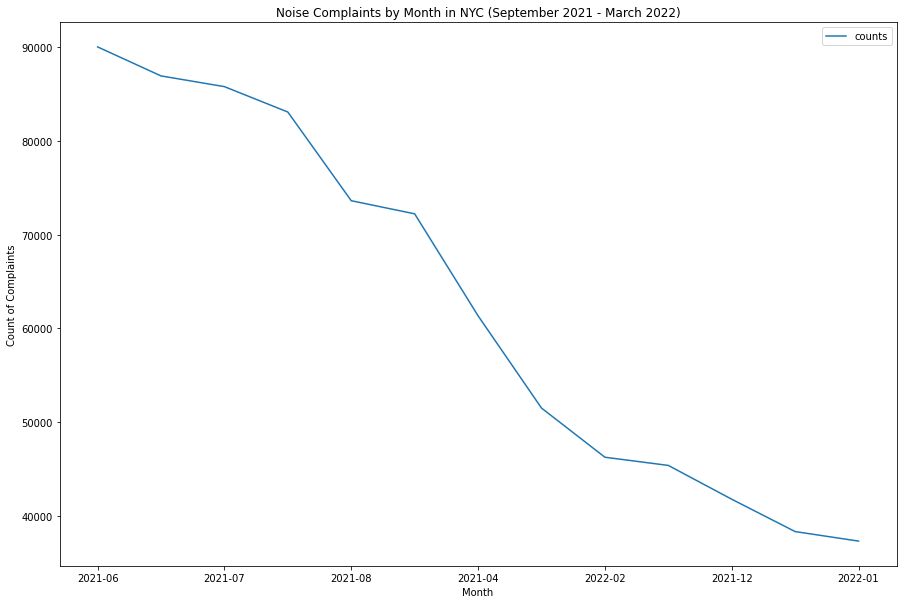

In [39]:
import matplotlib.pyplot as plt

noise_complaints_by_month.plot(x ='values', y='counts', kind = 'line', title ="Noise Complaints by Month in NYC (September 2021 - March 2022)", figsize=(15, 10))
plt.xlabel("Month")
plt.ylabel("Count of Complaints")
plt.show()

In [40]:
complaint_type_counts = df["Complaint Type"].value_counts().rename_axis('values').reset_index(name='counts')

complaint_type_counts.head(20)


,values,counts
0,Noise - Residential,384027
1,Noise - Street/Sidewalk,190142
2,Noise - Vehicle,90190
3,Noise - Commercial,61267
4,Noise,49192
5,Noise - Helicopter,26508
6,Noise - Park,9705
7,Noise - House of Worship,2482
8,Collection Truck Noise,1


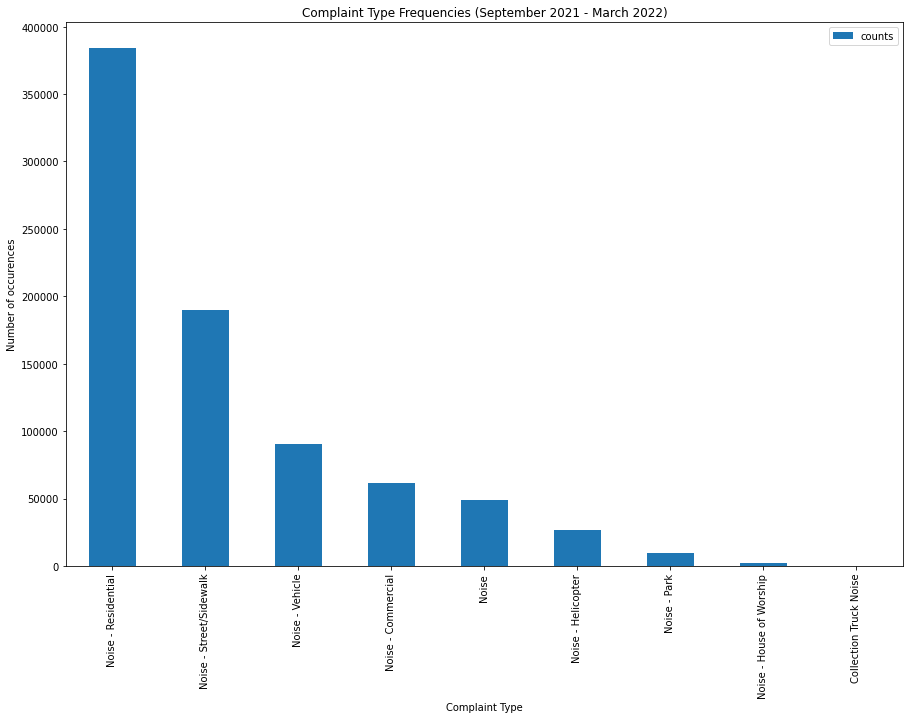

In [41]:
import matplotlib.pyplot as plt

complaint_type_counts.head(20).plot(x ='values', y='counts', kind = 'bar', title ="Complaint Type Frequencies (September 2021 - March 2022)", figsize=(15, 10))
plt.xlabel("Complaint Type")
plt.ylabel("Number of occurences")
plt.show()

In [42]:
df["created_hour"] = df["created_at"].dt.hour

In [46]:
by_hour_of_day = df["created_hour"].value_counts().rename_axis('values').reset_index(name='counts')

sorted_by_hour_of_day = by_hour_of_day.sort_values(by=['values'], ascending=True)
sorted_by_hour_of_day["values"] = sorted_by_hour_of_day["values"].astype(int)
sorted_by_hour_of_day

,values,counts
2,0,76567
5,1,52436
8,2,32677
12,3,21439
18,4,14843
22,5,10037
23,6,9353
21,7,10565
20,8,12459
19,9,14734


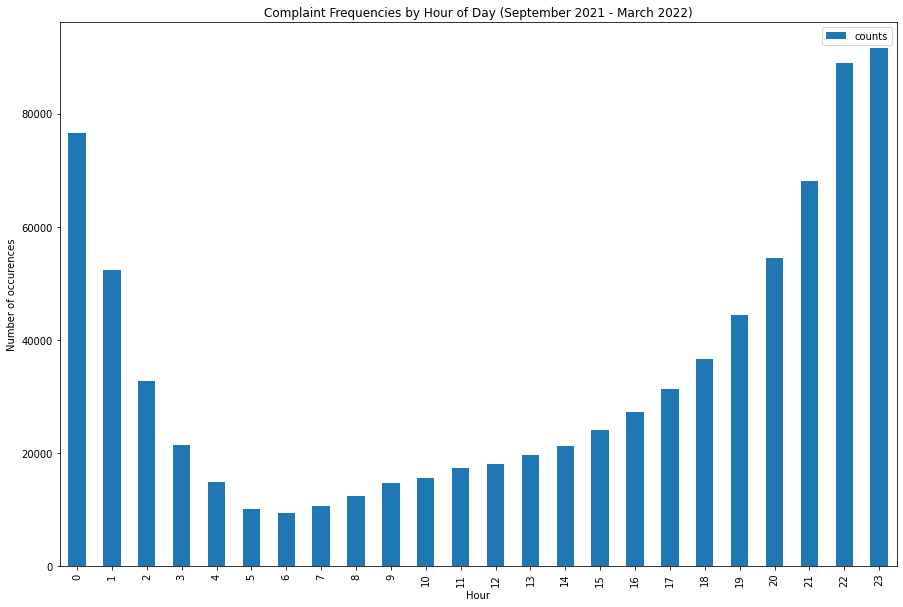

In [47]:
import matplotlib.pyplot as plt

sorted_by_hour_of_day.plot(x ='values', y='counts', kind = 'bar', title ="Complaint Frequencies by Hour of Day (September 2021 - March 2022)", figsize=(15, 10))
plt.xlabel("Hour")
plt.ylabel("Number of occurences")
plt.show()

In [99]:
closed_df["tat"] = (closed_df["closed_at"] - closed_df["created_at"]).dt.total_seconds() / 3600.0
closed_df = closed_df[closed_df["tat"] >= 0]

In [80]:
closed_df["tat"]

0          2.552778
1          0.279167
2          0.370278
3         25.983333
4          1.495000
            ...    
813497     0.357500
813498     0.217500
813500     0.159722
813501     0.229444
813505     0.094444
Name: tat, Length: 788400, dtype: float64

In [81]:
closed_df[closed_df["tat"] < 0].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,created_at,closed_at,created_month,created_hour,tat


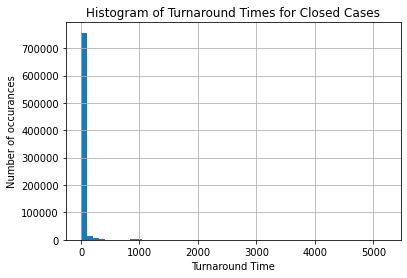

In [88]:
import matplotlib.pyplot as plt

closed_df.hist(column=['tat'], bins=50)
plt.ylabel("Number of occurances")
plt.xlabel("Turnaround Time")
plt.title("Histogram of Turnaround Times for Closed Cases")
plt.show()

In [89]:
incident_address_counts = df["Incident Address"].value_counts().rename_axis('values').reset_index(name='counts')

incident_address_counts.head(20)


,values,counts
0,672 EAST 231 STREET,31252
1,655 EAST 230 STREET,15701
2,78-15 PARSONS BOULEVARD,9775
3,674 EAST 231 STREET,3967
4,620 WEST 152 STREET,3160
5,18-11 129 STREET,2912
6,82-68 164 STREET,2506
7,1207 BEACH AVENUE,2088
8,200 WEST 131 STREET,1978
9,177 SANDS STREET,1954


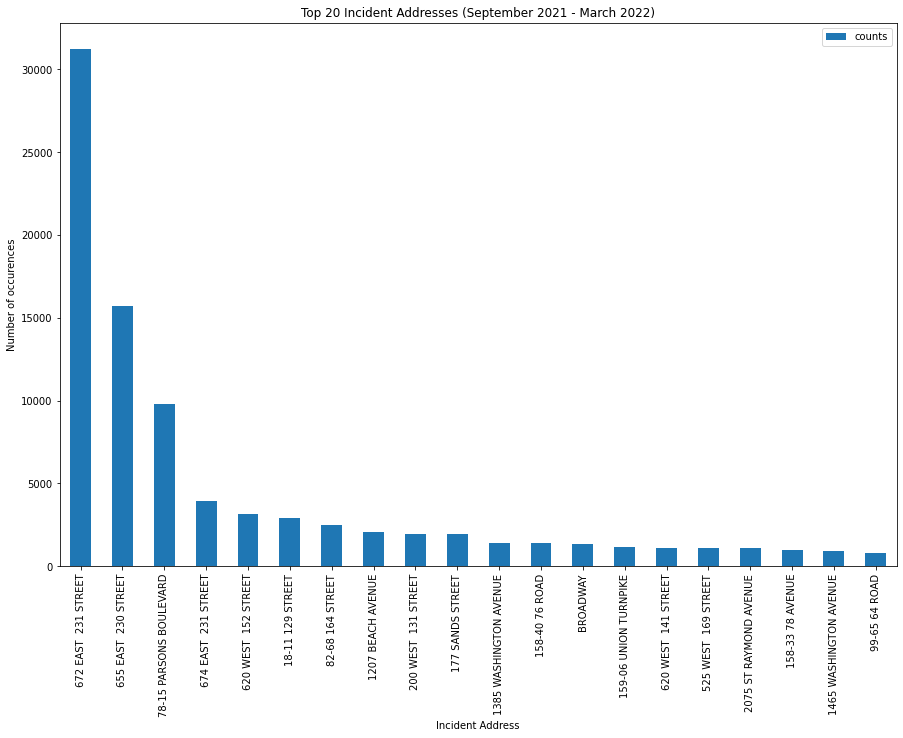

In [90]:
import matplotlib.pyplot as plt

incident_address_counts.head(20).plot(x ='values', y='counts', kind = 'bar', title ="Top 20 Incident Addresses (September 2021 - March 2022)", figsize=(15, 10))
plt.xlabel("Incident Address")
plt.ylabel("Number of occurences")
plt.show()

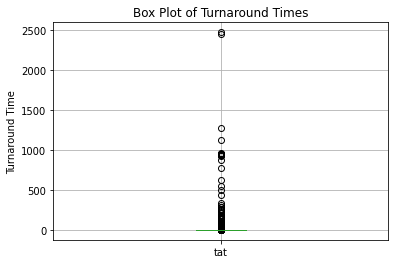

In [94]:
import matplotlib.pyplot as plt

closed_df.sample(1000).boxplot(column=['tat'])
plt.ylabel("Turnaround Time")
plt.title("Box Plot of Turnaround Times")
plt.show()

In [96]:
pending_df = df[df["closed_at"].isnull()]

In [100]:
pending_df.shape

(25036, 45)

In [102]:
import datetime

pending_df["pending_for"] = (pd.datetime.now() - pending_df["created_at"]).dt.total_seconds() / 3600.0
pending_df = pending_df[pending_df["pending_for"] >= 0]

/var/folders/7r/72pw73153fq0wxt3j2p7tklh0000gn/T/ipykernel_52086/1039119046.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pending_df["pending_for"] = (pd.datetime.now() - pending_df["created_at"]).dt.total_seconds() / 3600.0


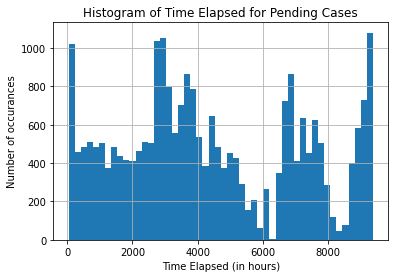

In [104]:
import matplotlib.pyplot as plt

pending_df.hist(column=['pending_for'], bins=50)
plt.ylabel("Number of occurances")
plt.xlabel("Time Elapsed (in hours)")
plt.title("Histogram of Time Elapsed for Pending Cases")
plt.show()

In [105]:
pending_noise_complaints_by_month = pending_df["created_month"].value_counts().rename_axis('values').reset_index(name='counts')

pending_noise_complaints_by_month

,values,counts
0,2021-11,3290
1,2021-03,2795
2,2021-10,2752
3,2021-06,2461
4,2021-05,2199
5,2021-12,2078
6,2022-03,2006
7,2021-09,1886
8,2022-01,1763
9,2022-02,1670


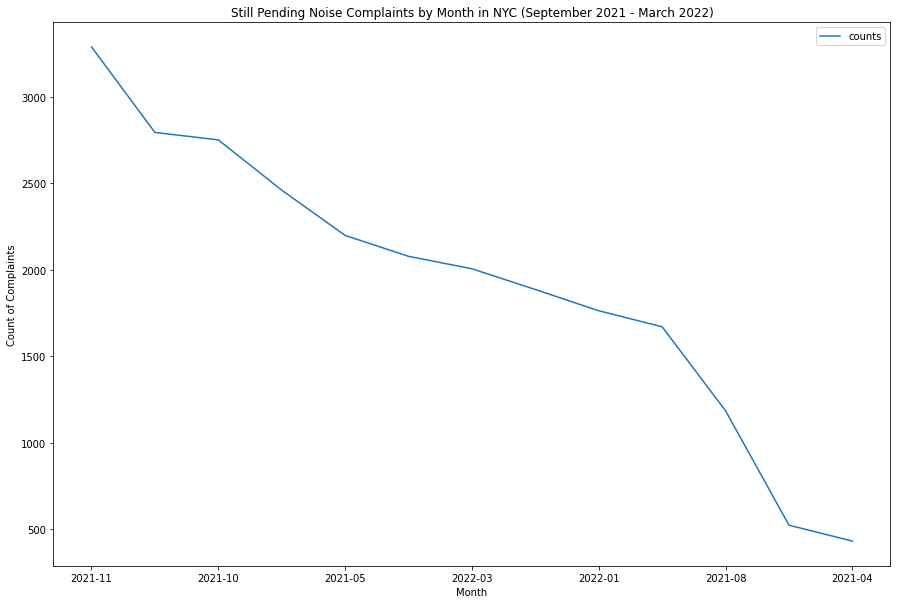

In [106]:
import matplotlib.pyplot as plt

pending_noise_complaints_by_month.plot(x ='values', y='counts', kind = 'line', title ="Still Pending Noise Complaints by Month in NYC (September 2021 - March 2022)", figsize=(15, 10))
plt.xlabel("Month")
plt.ylabel("Count of Complaints")
plt.show()